# 0-Libraries

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape

from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D

## Librerias oversampling


In [149]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [150]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# 1- Load Data

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from tensorflow.keras import layers


In [152]:
s_aureus = pd.read_csv('s_aureus_driams_a_bin3_2000_20000Da.csv')
s_aureus = s_aureus.fillna(0)
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19991,19994,19997,code,species,Oxacillin,Clindamycin,Ceftriaxone,Ciprofloxacin,Fusidic acid
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,35.5,20.500000,27.342857,029f0abf-1664-424f-88cb-11c9c8af2b11,Staphylococcus aureus,0.0,0.0,0.0,0.0,1.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,30.0,40.500000,34.695238,08149af1-10f5-4f02-81d8-3d46d66d4a7a,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,2.5,30.500000,11.288462,08fe3876-ecee-4ddc-9aa9-a84f605757f7,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,15.5,8.000000,20.057143,0a9fdd4b-7180-47c0-849e-cb32d46da94c,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,25.5,32.000000,24.990476,0d82f4c4-473c-49d8-8c85-e3e36e96d047,Staphylococcus aureus,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,288.000000,330.285714,296.142857,265.142857,310.750000,287.000000,345.000000,260.000000,198.714286,257.285714,...,0.0,0.000000,0.004038,fe72a46e-021e-4f0c-b81e-c4c4507e5aa8_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3787,1286.142857,989.714286,938.285714,901.428571,872.000000,1001.000000,1061.571429,890.857143,813.857143,961.000000,...,0.0,0.000000,0.053908,fe73e705-161f-49a7-b021-7e78d074129b_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3788,986.857143,977.285714,892.285714,986.714286,1045.875000,986.857143,963.571429,968.571429,960.857143,969.714286,...,0.0,0.000000,0.039084,feb54c45-54f7-4758-8408-2e94ab6c53e1_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3789,141.857143,197.428571,148.142857,114.000000,125.857143,158.750000,176.571429,148.285714,149.714286,151.714286,...,0.0,0.000000,0.012113,fef2ea82-be15-4e10-8685-77c42068455c_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0


# Preprocessing Data

In [153]:
s_aureus_oxacillin = s_aureus.drop(columns=['code','species', 'Clindamycin', 'Ceftriaxone', 'Ciprofloxacin', 'Fusidic acid'])
s_aureus_oxacillin.dropna(axis=0, how="any", inplace=True)

In [154]:
s_aureus_ceftriaxone = s_aureus.drop(columns=['Oxacillin', 'Clindamycin', 'Ceftriaxone', 'Fusidic acid'])
#ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.shape

(3791, 6003)

In [155]:
s_aureus_oxacillin.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Oxacillin
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,14.333333,24.0,68.0,19.0,19.000000,50.0,35.5,20.5,27.342857,0.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,15.666667,39.0,19.5,42.0,69.666667,31.0,30.0,40.5,34.695238,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,20.666667,17.0,2.0,18.0,18.000000,11.5,2.5,30.5,11.288462,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,22.333333,33.0,29.0,14.5,21.666667,24.5,15.5,8.0,20.057143,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,26.666667,25.5,18.0,53.5,23.000000,24.5,25.5,32.0,24.990476,1.0


In [156]:
X = s_aureus_oxacillin.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus_oxacillin.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [159]:
X_train

array([[-0.39234772, -0.4328882 , -0.42397916, ...,  0.2516329 ,
         0.27382737,  0.04491132],
       [-0.49214137, -0.5005734 , -0.47686246, ..., -0.56689554,
        -0.56091934, -0.59598553],
       [-0.33472997, -0.40271908, -0.35519633, ..., -0.38830754,
         0.2489837 ,  0.00755902],
       ...,
       [-0.12541495, -0.03057765, -0.05932636, ..., -0.2791704 ,
        -0.14354599, -0.30955842],
       [ 0.01859542, -0.05076646,  0.01312031, ..., -0.1650725 ,
         0.3781707 ,  0.08042048],
       [-0.1681521 , -0.17944825, -0.1268649 , ...,  0.2962799 ,
         0.244015  ,  0.88604414]], dtype=float32)

## Aplicacion de gan

Etiquetas

In [182]:
import torch

# Supongamos que tienes las etiquetas de clase como un array
y_train = np.array(y_train)  # Ejemplo de etiquetas de entrenamiento

# Convertir las etiquetas a formato one-hot
num_classes = 2  # Solo tenemos dos clases (0 y 1)
y_train_one_hot = torch.zeros(len(y_train), num_classes)
y_train_one_hot[range(len(y_train)), y_train.astype(int)] = 1

print(y_train_one_hot)



tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])


In [181]:
y_train

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [160]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca_2d_normalizer = scaler.fit_transform(X_train_pca_2d)


In [162]:
train_set = [
    (X_train_pca_2d_normalizer[i], y_train[i]) for i in range(len(X_train_pca_2d_normalizer))
]

In [163]:
train_set

[(array([-0.21537177, -0.52384585], dtype=float32), 1.0),
 (array([-0.78550833, -0.2974892 ], dtype=float32), 1.0),
 (array([ 0.08455412, -0.00034997], dtype=float32), 0.0),
 (array([-0.15314165,  0.73857576], dtype=float32), 0.0),
 (array([-0.01154628,  1.4393547 ], dtype=float32), 0.0),
 (array([ 0.45798182, -0.48882338], dtype=float32), 0.0),
 (array([-0.67640555,  0.03268439], dtype=float32), 0.0),
 (array([-0.2533508,  1.279134 ], dtype=float32), 0.0),
 (array([-0.6228134 , -0.17115529], dtype=float32), 1.0),
 (array([ 0.14629298, -0.9358723 ], dtype=float32), 0.0),
 (array([-0.42119226, -0.22042227], dtype=float32), 0.0),
 (array([ 0.0310608 , -0.67694515], dtype=float32), 0.0),
 (array([-0.40988007,  0.15898563], dtype=float32), 0.0),
 (array([-0.70833343,  0.6837305 ], dtype=float32), 0.0),
 (array([3.5190427 , 0.43990368], dtype=float32), 1.0),
 (array([ 0.25814432, -0.7986745 ], dtype=float32), 0.0),
 (array([-0.47263396, -0.2868221 ], dtype=float32), 0.0),
 (array([-0.430497

In [164]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [165]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [166]:
discriminator = Discriminator()

In [167]:
lr = 0.0002
num_epochs = 600
loss_function = nn.BCELoss()

In [168]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)


In [169]:
train_set

[(array([-0.21537177, -0.52384585], dtype=float32), 1.0),
 (array([-0.78550833, -0.2974892 ], dtype=float32), 1.0),
 (array([ 0.08455412, -0.00034997], dtype=float32), 0.0),
 (array([-0.15314165,  0.73857576], dtype=float32), 0.0),
 (array([-0.01154628,  1.4393547 ], dtype=float32), 0.0),
 (array([ 0.45798182, -0.48882338], dtype=float32), 0.0),
 (array([-0.67640555,  0.03268439], dtype=float32), 0.0),
 (array([-0.2533508,  1.279134 ], dtype=float32), 0.0),
 (array([-0.6228134 , -0.17115529], dtype=float32), 1.0),
 (array([ 0.14629298, -0.9358723 ], dtype=float32), 0.0),
 (array([-0.42119226, -0.22042227], dtype=float32), 0.0),
 (array([ 0.0310608 , -0.67694515], dtype=float32), 0.0),
 (array([-0.40988007,  0.15898563], dtype=float32), 0.0),
 (array([-0.70833343,  0.6837305 ], dtype=float32), 0.0),
 (array([3.5190427 , 0.43990368], dtype=float32), 1.0),
 (array([ 0.25814432, -0.7986745 ], dtype=float32), 0.0),
 (array([-0.47263396, -0.2868221 ], dtype=float32), 0.0),
 (array([-0.430497

In [170]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr * 0.5)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [172]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        
        
        real_samples_labels += 0.1 * torch.randn_like(real_samples_labels)
        real_samples_labels = torch.clamp(real_samples_labels, 0, 1)  # Limitar valores a [0, 1]

        generated_samples_labels += 0.1 * torch.randn_like(generated_samples_labels)
        generated_samples_labels = torch.clamp(generated_samples_labels, 0, 1)  # Limitar valores a [0, 1]


        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.6806430220603943
Epoch: 0 Loss G.: 0.7439534068107605
Epoch: 10 Loss D.: 0.5669472813606262
Epoch: 10 Loss G.: 0.995394229888916
Epoch: 20 Loss D.: 0.7006160020828247
Epoch: 20 Loss G.: 0.8649617433547974
Epoch: 30 Loss D.: 0.6942465901374817
Epoch: 30 Loss G.: 0.7278961539268494
Epoch: 40 Loss D.: 0.6834255456924438
Epoch: 40 Loss G.: 0.6910470724105835
Epoch: 50 Loss D.: 0.6882408857345581
Epoch: 50 Loss G.: 0.7164056301116943
Epoch: 60 Loss D.: 0.6917728185653687
Epoch: 60 Loss G.: 0.702446460723877
Epoch: 70 Loss D.: 0.6882129311561584
Epoch: 70 Loss G.: 0.690578281879425
Epoch: 80 Loss D.: 0.6817740201950073
Epoch: 80 Loss G.: 0.6859500408172607
Epoch: 90 Loss D.: 0.6905156970024109
Epoch: 90 Loss G.: 0.7212913632392883
Epoch: 100 Loss D.: 0.6960124969482422
Epoch: 100 Loss G.: 0.6780827641487122
Epoch: 110 Loss D.: 0.6991370916366577
Epoch: 110 Loss G.: 0.6879053711891174
Epoch: 120 Loss D.: 0.6937613487243652
Epoch: 120 Loss G.: 0.6940548419952393
Epoch: 130 

In [173]:
latent_space_samples = torch.randn(10000, 2)
generated_samples = generator(latent_space_samples)
# Predicción de etiquetas para las muestras generadas
generated_labels = generator.predict(generated_samples)


AttributeError: 'Generator' object has no attribute 'predict'

In [177]:
generated_samples

tensor([[-0.2997,  0.0477],
        [-0.7213,  0.4214],
        [-0.0796, -0.2084],
        ...,
        [-0.7725,  0.2669],
        [ 0.1556,  0.1450],
        [-0.2717, -0.0510]])

In [178]:
generated_samples[:, 0]

tensor([-0.2997, -0.7213, -0.0796,  ..., -0.7725,  0.1556, -0.2717])

In [137]:
X_train

array([[-0.39234772, -0.4328882 , -0.42397916, ...,  0.2516329 ,
         0.27382737,  0.04491132],
       [-0.49214137, -0.5005734 , -0.47686246, ..., -0.56689554,
        -0.56091934, -0.59598553],
       [-0.33472997, -0.40271908, -0.35519633, ..., -0.38830754,
         0.2489837 ,  0.00755902],
       ...,
       [-0.12541495, -0.03057765, -0.05932636, ..., -0.2791704 ,
        -0.14354599, -0.30955842],
       [ 0.01859542, -0.05076646,  0.01312031, ..., -0.1650725 ,
         0.3781707 ,  0.08042048],
       [-0.1681521 , -0.17944825, -0.1268649 , ...,  0.2962799 ,
         0.244015  ,  0.88604414]], dtype=float32)

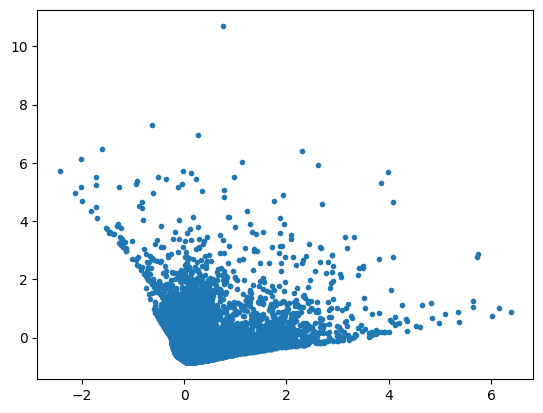

In [176]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 1],generated_samples[:, 0],  ".")

In [129]:
len(generated_samples)

1000

In [130]:
print(X_train_balanced.shape)  # (4902, 6000)
print(y_train_balanced.shape)  # (4902,)

NameError: name 'X_train_balanced' is not defined

In [101]:
print(pd.Series(y_train).value_counts())

0.0    2451
1.0     581
Name: count, dtype: int64


In [ ]:
print(pd.Series(y_train_balanced).value_counts())


0.0    2451
1.0    2451
Name: count, dtype: int64


In [ ]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_train_balanced)
X_test = sc_X.transform(X_test)

In [ ]:
X_train_balanced.shape[0]

4902

In [ ]:
sample_size = X_train_balanced.shape[0] # numero de muestras en el set de datos
time_steps  = X_train_balanced.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_train_balanced.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

# Create and fit DeepAMR model

In [ ]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

/home/hpinto/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_s_aureus_ciprofloxacin"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv1D)                 │ (None, 5984, 64)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5984, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5984, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_1 (MaxPooling1D)   │ (None, 2992, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv1D)                 │ (None, 2984, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2984, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2984, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_2 (MaxPooling1D)   │ (None, 1492, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv1D)                 │ (None, 1488, 256)      │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1488, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1488, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_3 (MaxPooling1D)   │ (None, 744, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv1D)                 │ (None, 740, 256)       │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 740, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 740, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_4 (MaxPooling1D)   │ (None, 370, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_0 (Dense)       │ (None, 256)            │    24,248,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_1 (Dense)       │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_2 (Dense)       │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUT_Layer (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,839,105 (94.75 MB)

 Trainable params: 24,837,697 (94.75 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
history = model.fit(X_train_reshaped, y_train_balanced, epochs=1, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

E0000 00:00:1733438931.072205 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1733438931.239136 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-12-05 19:48:51.250310: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/hpinto/.local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_3674476/2643947770.py", line 1, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_7962]

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)



RuntimeError: Physical devices cannot be modified after being initialized

# Evaluate the model

In [ ]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
[[614   0]
 [145   0]]


In [ ]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.5


In [ ]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       614
           1       0.00      0.00      0.00       145

    accuracy                           0.81       759
   macro avg       0.40      0.50      0.45       759
weighted avg       0.65      0.81      0.72       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
loss :  1.0671391487121582
compile_metrics :  0.0



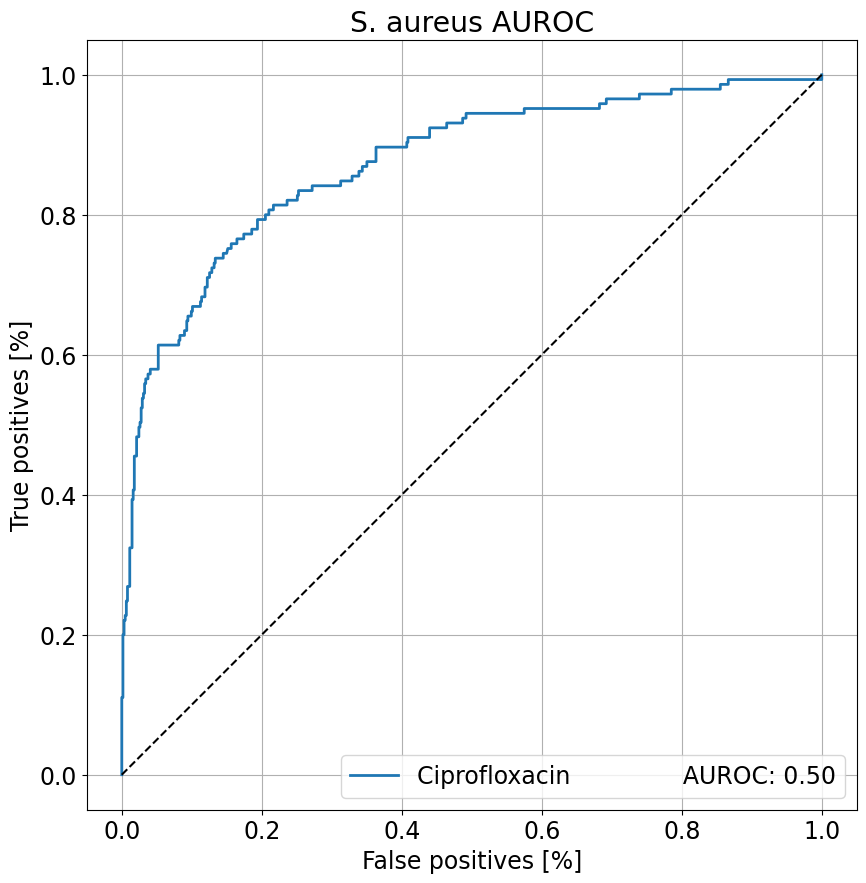

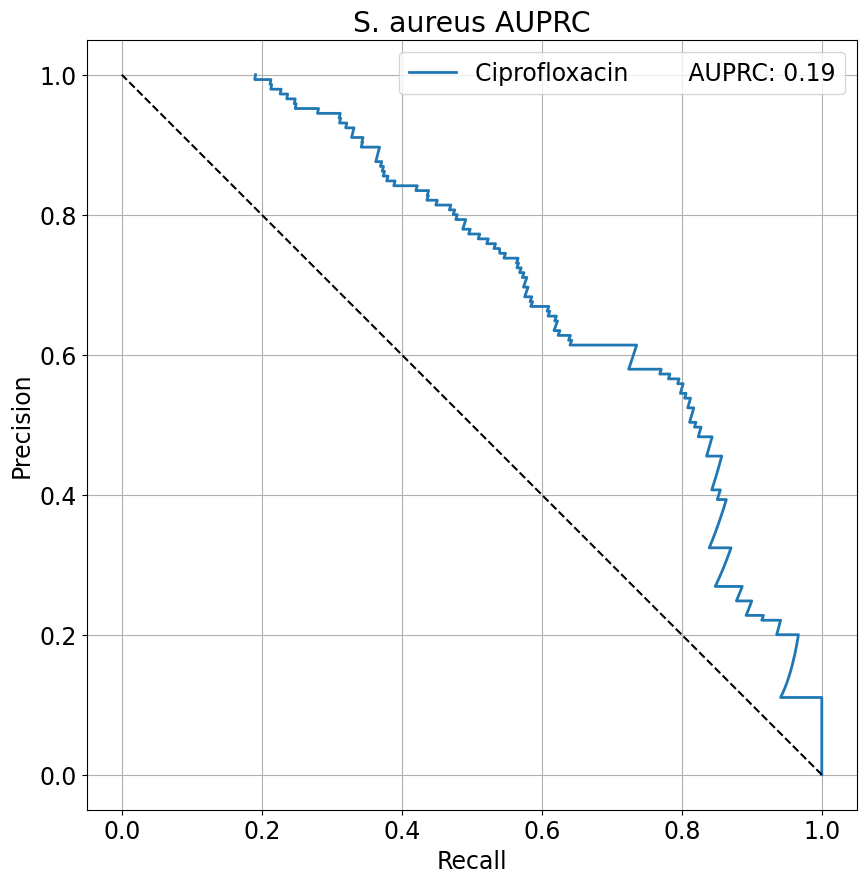

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()